In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import time

# free particle with initial state as a Gaussian wave packet

In [2]:
T = 0.1
Nscale = 30
L = Nscale*100*T
N = int(T * Nscale * 1.5 + 1)
M = int(L * Nscale)
x = np.linspace(-L, L, M + 1)
dx = 2*L/M
dt = T/(N + 1)
#---------------------------------------------------------
time_seconds = np.log(N) * M**3 * 1.8e-10
hours = int(time_seconds // 3600)
minutes = int((time_seconds % 3600) // 60)
seconds = int(time_seconds % 60)
print(f'(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+'))')
print(f"Estimated time: {hours}h {minutes}min {seconds}s")

(T=0.1, L=300.0, M=9000, N=5, (Nscale=30))
Estimated time: 0h 3min 31s


In [ ]:
k0 = 1
m = 1
psi_0 = (2 / np.pi)**(1/4) * np.exp(- x**2 + 1j * k0 * x)
'''
K = []
for xi in x:
    Ki = []
    for xj in x:
        Kij = (m / (2 * np.pi * 1j * dt))**0.5 * np.exp(1j * (m / 2 * (xi - xj)**2/dt))
        Ki.append(Kij)
    K.append(Ki)
K = np.array(K)
'''
# Assuming x is a NumPy array
x = np.asarray(x)
X_i, X_j = np.meshgrid(x, x, indexing='ij')
K = (m / (2 * np.pi * 1j * dt))**0.5 * np.exp(1j * (m / 2 * (X_i - X_j)**2 / dt))
#print(f'condition(K) = {np.linalg.cond(K)}')

run_time_start = time.time()
#KpowerN = K
#for i in range(N):
#    KpowerN = KpowerN @ K # K^{N + 1}
#KpowerN = np.linalg.matrix_power(K, N+1)
psi_final = psi_0
for i in range(N+1):
    psi_final = dx * K @ psi_final
run_time_end = time.time()

#si_final = dx**(N + 1) * KpowerN @ psi_0

print(f't/complexity = {(run_time_end-run_time_start)/(np.log(N) * M**3)}')
np.save('data/(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+')) - psi_final.npy', psi_final)

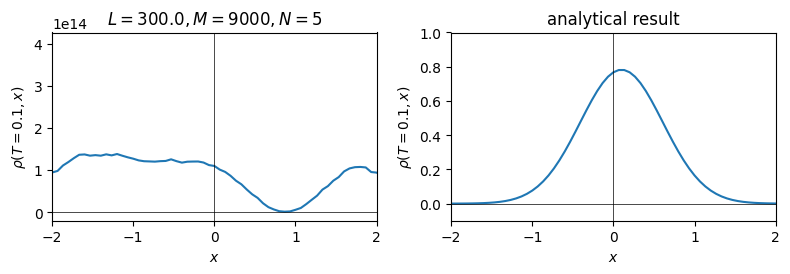

Nscale = 30


In [15]:
psi_final = np.load('data/(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+')) - psi_final.npy')
rho_final = (psi_final.real)**2 + (psi_final.imag)**2
xmax = 2
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].plot(x, rho_final)
axes[0].set_xlim(-xmax, xmax)
#axes[0].set_ylim(-1e100, 1e131)
axes[0].axvline(x=0, linestyle='-', linewidth=0.5, color='black')
axes[0].axhline(y=0, linestyle='-', linewidth=0.5, color='black')
axes[0].set_title('$L = '+f'{L}'+', M = '+f'{M}'+', N = '+f'{N}$')
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$\\rho(T = '+f'{T}'+', x)$')

psi_analytically = (2/np.pi)**(1/4) * np.sqrt(m/(m + 1j * 2 * T)) * np.exp(m/(m + 1j * 2 * T) * (- x**2 + 1j * k0 * x) - 1j * k0**2 / (2 * (m + 1j * 2 * T)) * T)
rho_analytically = (psi_analytically.real)**2 + (psi_analytically.imag)**2
axes[1].plot(x, rho_analytically)
axes[1].set_xlim(-xmax, xmax)
axes[1].set_ylim(-0.1, 1)
axes[1].axvline(x=0, linestyle='-', linewidth=0.5, color='black')
axes[1].axhline(y=0, linestyle='-', linewidth=0.5, color='black')
axes[1].set_title('analytical result')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$\\rho(T = '+f'{T}'+', x)$')

plt.tight_layout()
plt.savefig('path integral numerically of a free particle with initial state as a Gaussian wave packet and T='+f'{T}'+' (L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+').pdf', format='pdf')
plt.show()
print(f'Nscale = {Nscale}')

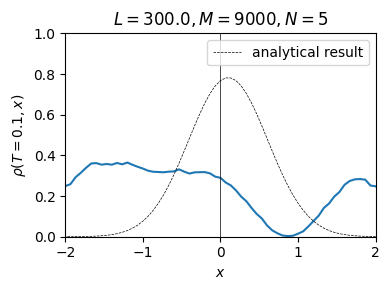

A = 1.097407 * 10^(14)


In [18]:
load = 0
if load == 0:
    psi_final = np.load('data/(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+')) - psi_final.npy')
else: # load == 1
    psi_final = np.load('data/(T=0.1, L=300.0, M=9001, N=4, (Nscale=30)) - psi_final.npy')
    T=0.1
    L=300
    M=9001-1
    N=4

rho_final = (psi_final.real)**2 + (psi_final.imag)**2
xmax = 2
x = np.linspace(-L, L, M+1)
dx = 2*L/M
rho_renormalized = []
for i in range(len(psi_final)):
    if x[i] + dx > - xmax and x[i] - dx < xmax:
        rho_renormalized.append(rho_final[i])
    else:
        rho_renormalized.append(0)
rho_renormalized = np.array(rho_renormalized)
A = sum(rho_renormalized) * dx
rho_renormalized = rho_renormalized / A
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(x, rho_renormalized)
psi_analytically = (2/np.pi)**(1/4) * np.sqrt(m/(m + 1j * 2 * T)) * np.exp(m/(m + 1j * 2 * T) * (- x**2 + 1j * k0 * x) - 1j * k0**2 / (2 * (m + 1j * 2 * T)) * T)
rho_analytically = (psi_analytically.real)**2 + (psi_analytically.imag)**2
ax.plot(x, rho_analytically, linestyle='--', linewidth=0.5, color='black', label='analytical result')
ax.axvline(x=0, linestyle='-', linewidth=0.5, color='black')
ax.set_title('$L = '+f'{L}'+', M = '+f'{M}'+', N = '+f'{N}$')
ax.set_xlabel('$x$')
ax.set_ylabel('$\\rho(T = '+f'{T}'+', x)$')
ax.set_xlim(-xmax, xmax)
ax.set_ylim(0, 1)
ax.legend()
plt.tight_layout()
plt.savefig('path integral numerically (normalized) of a free particle with initial state as a Gaussian wave packet and T='+f'{T}'+' (L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+').pdf', format='pdf')
plt.show()

Ascale = int(np.log(rho_final[int(M/2)])/np.log(10))
print(f'A = {(rho_final[int(M/2)] / 10**Ascale):1f} * 10^({Ascale})')

In [27]:
int(11.99)

11

In [ ]:
psi_renormalized = np.array(rho_renormalized)
A = sum(rho_renormalized) * dx
psi_renormalized = psi_renormalized / A
B = sum(rho_renormalized) * dx
print(A, B)

105750355034.41866 105750355034.41866


# harmonic oscilator

In [17]:
L = 50
T = 0.01
N = 40
M = 1000
x = np.linspace(-L, L, M)
dx = 2*L/(M-1)
dt = T/(N - 1 + 1)

m = 1
omega = 1
k0 = 1
psi_0 = (2 / np.pi)**(1/4) * np.exp(- x**2 + 1j * k0 * x)
K = []
for xi in x:
    Ki = []
    for xj in x:
        Kij = (m / (2 * np.pi * 1j * dt))**0.5 * np.exp(1j * (m / 2 * (xi - xj)**2/dt - dt * m/2 * omega**2 * xi**2))
        Ki.append(Kij)
    K.append(Ki)
K = np.array(K)
KpowerN = K
for i in range(N):
    KpowerN = KpowerN @ K # K^{N + 1}
psi_final = dx**(N + 1) * KpowerN @ psi_0


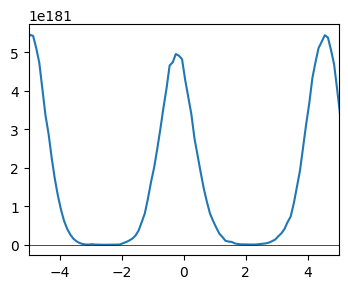

In [19]:
rho_final = (psi_final.real)**2 + (psi_final.imag)**2
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(x, rho_final)
ax.set_xlim(-L/10, L/10)
ax.axhline(y=0, linestyle='-', linewidth=0.5, color='black')
plt.show()

# (almost-)infinite square well

In [36]:
L = 50
T = 0.01
N = 5
M = 1000
x = np.linspace(-L, L, M)
dx = 2*L/(M-1)
dt = T/(N - 1 + 1)

m = 1
def V(x):
    if x > 10 or x < - 10:
        return 100000
    else:
        return 0
#k0 = 1
psi_0 = []
for xi in x:
    if xi < 1/2 and xi > - 1/2:
        psi_0.append(1)
    else:
        psi_0.append(0)
psi_0 = np.array(psi_0)

K = []
for xi in x:
    Ki = []
    for xj in x:
        Kij = (m / (2 * np.pi * 1j * dt))**0.5 * np.exp(1j * (m / 2 * (xi - xj)**2/dt - dt * V(xi)))
        Ki.append(Kij)
    K.append(Ki)
K = np.array(K)
KpowerN = K
for i in range(N):
    KpowerN = KpowerN @ K # K^{N + 1}
psi_final = dx**(N + 1) * KpowerN @ psi_0

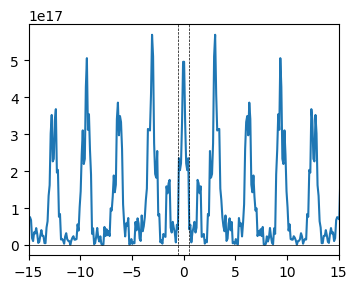

In [37]:
rho_final = (psi_final.real)**2 + (psi_final.imag)**2
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(x, rho_final)
ax.set_xlim(-15, 15)
ax.axhline(y=0, linestyle='-', linewidth=0.5, color='black')
ax.axvline(x=1/2, linestyle='--', linewidth=0.5, color='black')
ax.axvline(x=-1/2, linestyle='--', linewidth=0.5, color='black')
plt.show()